In [2]:
import pandas as pd 
import numpy as np 

#set seed for reproducibility 
np.random.seed(42)

#sample size 
n_samples = 1000

#Generate data 
data = {
    'age': np.random.randint(18, 65, size=n_samples),
    'gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'income': np.random.randint(20000, 100000, size=n_samples),
    'daily_physical_activity': np.random.randint(0, 120, size=n_samples), # Minutes per day
    'servings_fruits_veggies': np.random.randint(0, 10, size=n_samples), # Servings per day
    'BMI': np.random.uniform(18.5, 40, size=n_samples),
    'self_reported_health_status': np.random.choice(['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], size=n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

# Save the dataframe to a CSV file
df.to_csv('dataset.csv', index=False)

   age  gender  income  daily_physical_activity  servings_fruits_veggies  \
0   56    Male   49241                        2                        7   
1   46  Female   64569                       86                        6   
2   32  Female   31745                       89                        5   
3   60  Female   46029                       36                        6   
4   25    Male   33025                       87                        4   

         BMI self_reported_health_status  
0  24.346840                   Excellent  
1  33.385717                        Fair  
2  24.177333                   Excellent  
3  38.689972                        Good  
4  32.182047                        Fair  


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [44]:
#1
#load dataser 
df = pd.read_csv('dataset.csv')

#display the first few rows of the dataset 
print("First few rows od the dataset: ")
print(df.head())

First few rows od the dataset: 
   age  gender  income  daily_physical_activity  servings_fruits_veggies  \
0   56    Male   49241                        2                        7   
1   46  Female   64569                       86                        6   
2   32  Female   31745                       89                        5   
3   60  Female   46029                       36                        6   
4   25    Male   33025                       87                        4   

         BMI self_reported_health_status  
0  24.346840                   Excellent  
1  33.385717                        Fair  
2  24.177333                   Excellent  
3  38.689972                        Good  
4  32.182047                        Fair  


In [45]:
#2. Generate Summary Statistic 
print("\n Summary Statistic of the dataset: ")
print(df.describe())


 Summary Statistic of the dataset: 
               age        income  daily_physical_activity  \
count  1000.000000   1000.000000              1000.000000   
mean     40.986000  59872.392000                58.337000   
std      13.497852  22721.921068                34.303472   
min      18.000000  20162.000000                 0.000000   
25%      29.000000  41784.750000                29.000000   
50%      42.000000  58750.500000                58.000000   
75%      52.000000  79689.250000                87.000000   
max      64.000000  99973.000000               119.000000   

       servings_fruits_veggies          BMI  
count               1000.00000  1000.000000  
mean                   4.51900    29.126424  
std                    2.91996     6.181659  
min                    0.00000    18.500660  
25%                    2.00000    23.841056  
50%                    5.00000    29.058218  
75%                    7.00000    34.370867  
max                    9.00000    39.990491  

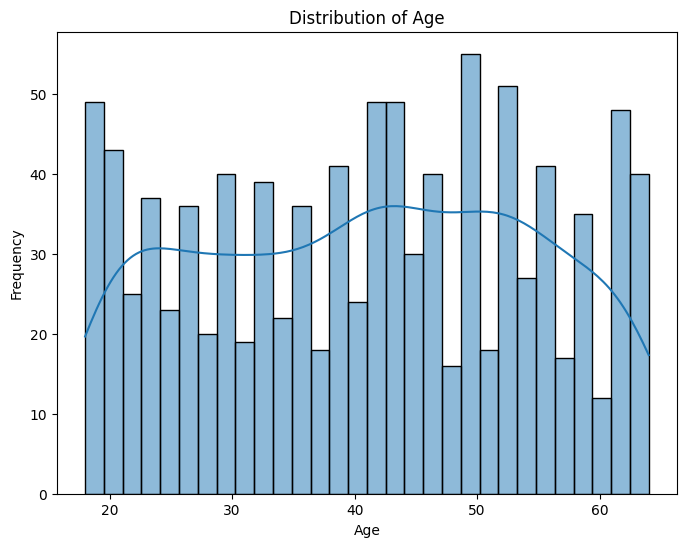

In [47]:
#3 create visualization 
#histogram  age distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

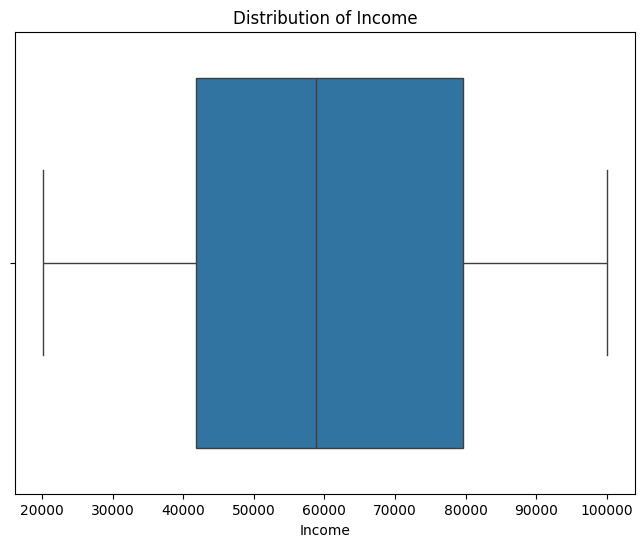

In [48]:
#box plot income 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='income')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.show()

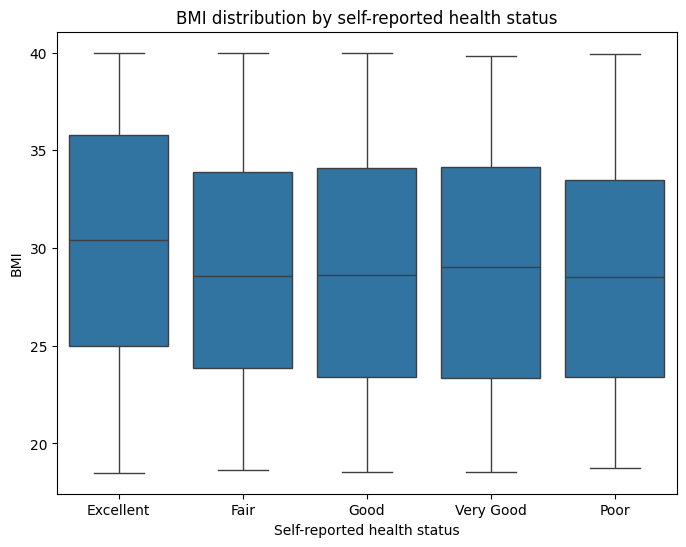

In [49]:
#box plot of BMI distribution by self-reported healt status 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='self_reported_health_status', y='BMI')
plt.title('BMI distribution by self-reported health status')
plt.xlabel('Self-reported health status')
plt.ylabel('BMI')
plt.show()

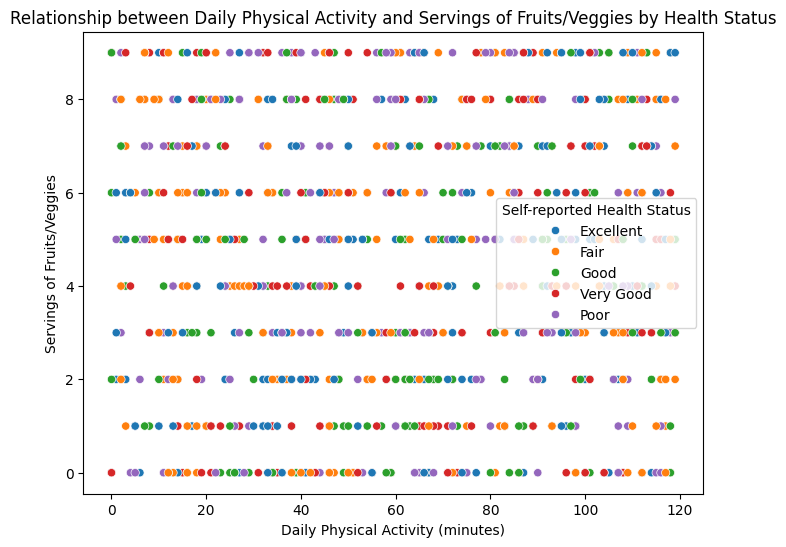

In [50]:
#scatter plot of daily physical activity vs Servings of Fruits and Vegetables colored by Self-reported Health Status
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='daily_physical_activity', y='servings_fruits_veggies', hue='self_reported_health_status')
plt.title('Relationship between Daily Physical Activity and Servings of Fruits/Veggies by Health Status')
plt.xlabel('Daily Physical Activity (minutes)')
plt.ylabel('Servings of Fruits/Veggies')
plt.legend(title='Self-reported Health Status')
plt.show()

In [51]:
#CHECK MISSING VALUES 
print("Missing values in the dataset: ")
print(df.isnull().sum())

Missing values in the dataset: 
age                            0
gender                         0
income                         0
daily_physical_activity        0
servings_fruits_veggies        0
BMI                            0
self_reported_health_status    0
dtype: int64


In [52]:
#remove rows with missing values 
df.dropna(inplace=True)

In [53]:
from scipy import stats

In [54]:
# Identifying and handling outliers
# Identify outliers using Z-score
z_scores = stats.zscore(df[['age', 'income', 'daily_physical_activity', 'servings_fruits_veggies', 'BMI']])
outliers = df[(z_scores > 3).any(axis=1)]

In [55]:
# Remove outliers 
df = df[(z_scores < 3).all(axis=1)]

In [56]:
# Convert categorical variables
# One-hot encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['gender', 'self_reported_health_status'], drop_first=True)

In [57]:
# Display the cleaned dataset
print("\nCleaned dataset:")
print(df.head())


Cleaned dataset:
   age  income  daily_physical_activity  servings_fruits_veggies        BMI  \
0   56   49241                        2                        7  24.346840   
1   46   64569                       86                        6  33.385717   
2   32   31745                       89                        5  24.177333   
3   60   46029                       36                        6  38.689972   
4   25   33025                       87                        4  32.182047   

   gender_Male  self_reported_health_status_Fair  \
0         True                             False   
1        False                              True   
2        False                             False   
3        False                             False   
4         True                              True   

   self_reported_health_status_Good  self_reported_health_status_Poor  \
0                             False                             False   
1                             False             

In [73]:
# Feature Engineering

# 1. Create new features that might be helpful for predicting health status. Explain the
# reasoning behind creating these new features and how they might improve the model's
# performance.

# For example, we can create a new feature 'total_hours_activity' by combining 'daily_physical_activity'
# and 'servings_fruits_veggies' to represent the overall healthy lifestyle. We can also create a feature
# 'BMI_category' to categorize BMI into different groups such as underweight, normal weight, overweight,
# and obese.

# Create new feature 'total_hours_activity'
df['total_hours_activity'] = df['daily_physical_activity'] + df['servings_fruits_veggies']

# Create new feature 'BMI_category'
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['BMI'].apply(categorize_bmi)

# Display the first few rows to verify the new features
print(df.head())

   age  income  daily_physical_activity  servings_fruits_veggies        BMI  \
0   56   49241                        2                        7  24.346840   
1   46   64569                       86                        6  33.385717   
2   32   31745                       89                        5  24.177333   
3   60   46029                       36                        6  38.689972   
4   25   33025                       87                        4  32.182047   

   gender_Male  self_reported_health_status_Fair  \
0         True                             False   
1        False                              True   
2        False                             False   
3        False                             False   
4         True                              True   

   self_reported_health_status_Good  self_reported_health_status_Poor  \
0                             False                             False   
1                             False                             Fa

In [74]:
# 2. Discuss any feature selection or dimensionality reduction techniques applied to the
# dataset to enhance model performance and reduce overfitting.

# For feature selection, we can use techniques like correlation analysis, feature importance,
# and recursive feature elimination (RFE) to identify and select the most relevant features.
# Additionally, we can apply dimensionality reduction techniques such as principal component
# analysis (PCA) or feature extraction methods like t-distributed stochastic neighbor embedding (t-SNE)
# to reduce the number of features while preserving the variance in the data.

# Let's perform correlation analysis to identify highly correlated features and select the most
# relevant ones for the model.

# Feature Selection
# Correlation analysis
correlation_matrix = df.corr()
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Drop highly correlated features
df_filtered = df.drop(columns=highly_correlated_features)

# Display the first few rows of the filtered DataFrame
print("Filtered DataFrame:")
print(df_filtered.head())

ValueError: could not convert string to float: 'Normal weight'